In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_datareader import data as web
import warnings
warnings.filterwarnings("ignore")

prices = pd.DataFrame()
tickers = ['ITUB3.SA', 'BBDC3.SA', 'BBAS3.SA', 'SANB3.SA', '^BVSP']
for i in tickers:
    prices[i] = web.get_data_yahoo(i,'01/01/2008')['Adj Close']

In [49]:
prices.head()

,ITUB3.SA,BBDC3.SA,BBAS3.SA,SANB3.SA,^BVSP
Date,,,,,
2008-01-02,9.083080,8.335854,16.662554,9.473665,62815.0
2008-01-03,8.823554,8.237810,16.410950,9.477336,62892.0
2008-01-04,8.823554,8.411230,16.220833,7.829104,61037.0
2008-01-07,8.693797,8.494461,16.606646,7.829104,60772.0
2008-01-08,8.758710,8.686973,16.947721,8.241162,62081.0


In [50]:
prices.rename(columns ={'ITUB3.SA':'ITUB', 'BBDC3.SA':'BBDC','BBAS3.SA':'BBAS','SANB3.SA':'SANB', '^BVSP':'IBOV'},inplace = True)
prices['IBOV'] = prices['IBOV']/1000
prices.reset_index(inplace = True)

In [51]:
prices.dropna(subset = ['IBOV'], inplace = True)
prices.IBOV.isnull().sum()

0

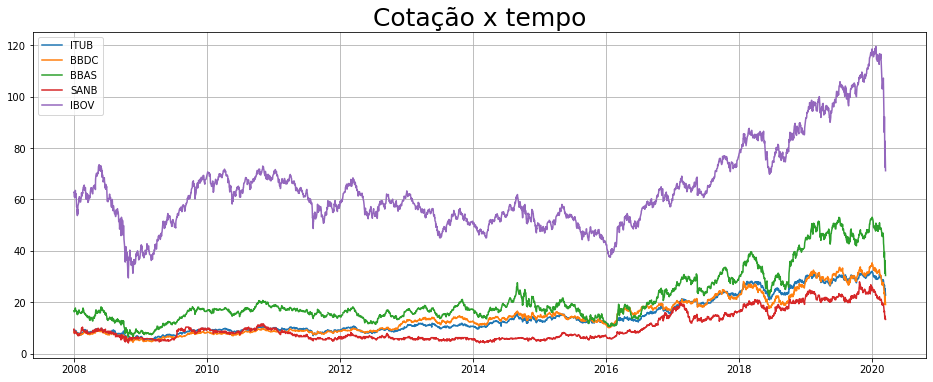

In [52]:
tickers = list(prices.drop(['Date'], axis = 1).columns)
plt.figure(figsize=(16,6))

for i in tickers:
        plt.plot(prices['Date'], prices[i])
plt.legend(tickers)
plt.grid()
plt.title("Cotação x tempo", fontsize = 25)
plt.show()

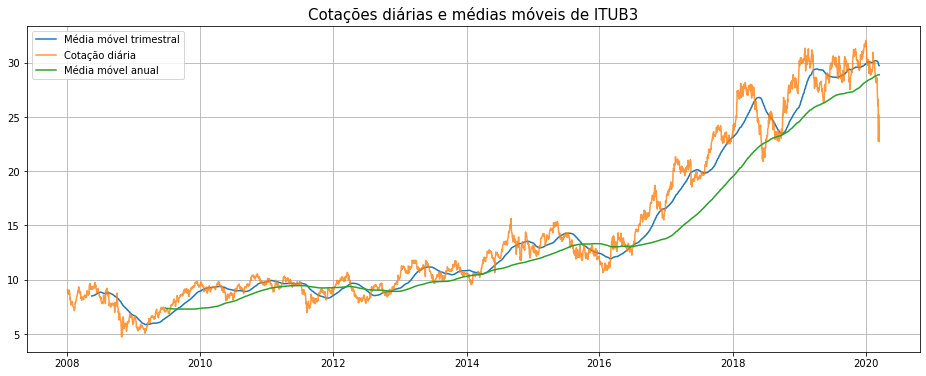

In [53]:
plt.figure(figsize=(16,6))
plt.plot(prices['Date'],prices['ITUB'].rolling(window = 90).mean())
plt.plot(prices['Date'], prices['ITUB'], alpha = 0.8)
plt.plot(prices['Date'],prices['ITUB'].rolling(window = 365).mean())
plt.grid()
plt.title('Cotações diárias e médias móveis de ITUB3', fontsize = 15)
plt.legend(['Média móvel trimestral','Cotação diária','Média móvel anual'])
plt.show()

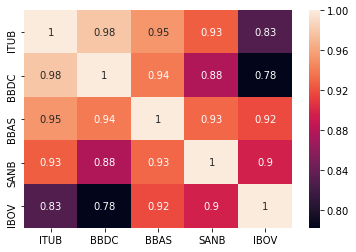

In [54]:
sns.heatmap(prices.corr(), annot = True)
plt.show()

In [55]:
returns = pd.DataFrame()
for i in tickers:
    returns[i] = prices[i].pct_change()
returns['Date'] = prices['Date']

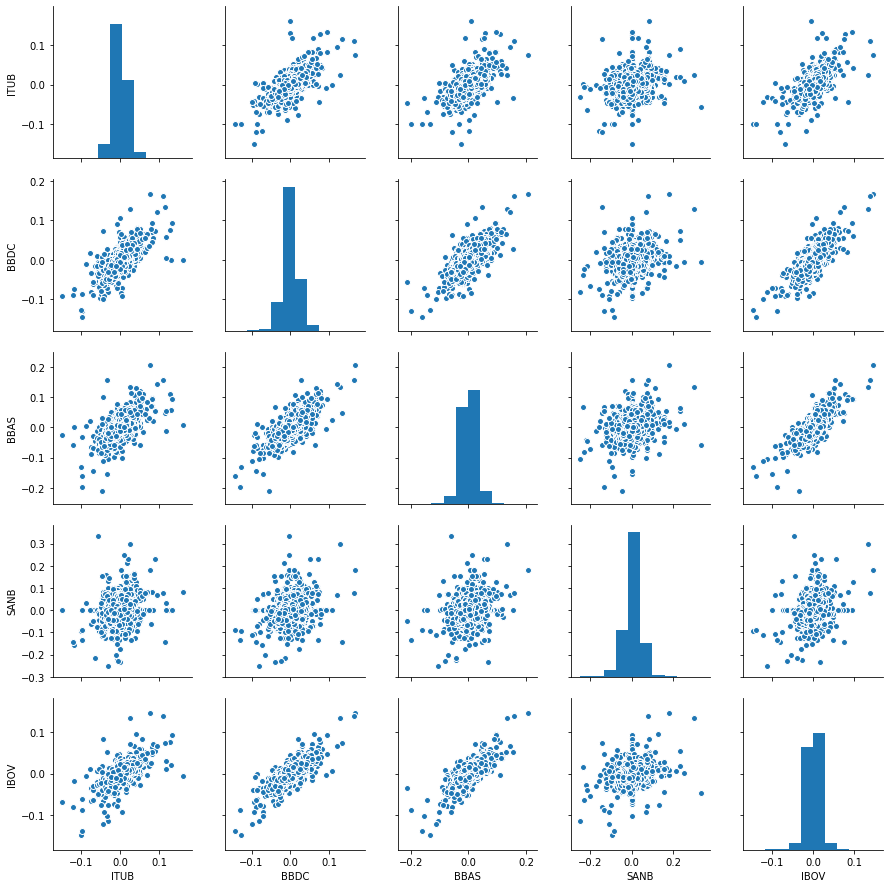

In [56]:
sns.pairplot(returns)
plt.show()

In [57]:
returns.describe()

,ITUB,BBDC,BBAS,SANB,IBOV
count,3009.000000,3009.000000,3009.000000,3009.000000,3009.000000
mean,0.000515,0.000518,0.000582,0.001035,0.000202
std,0.020491,0.022042,0.027630,0.043023,0.017899
min,-0.150000,-0.143498,-0.211712,-0.250000,-0.147797
25%,-0.010216,-0.011496,-0.014400,-0.013947,-0.008502
50%,0.000243,0.000000,0.000000,0.000000,0.000395
75%,0.011053,0.011843,0.014661,0.014873,0.009253
max,0.160787,0.167240,0.207143,0.333334,0.146560


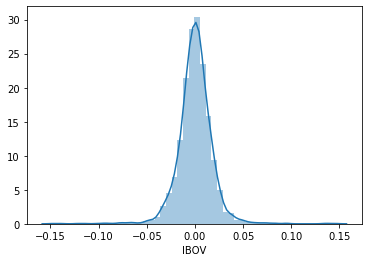

In [58]:
sns.distplot(returns['IBOV'].dropna())

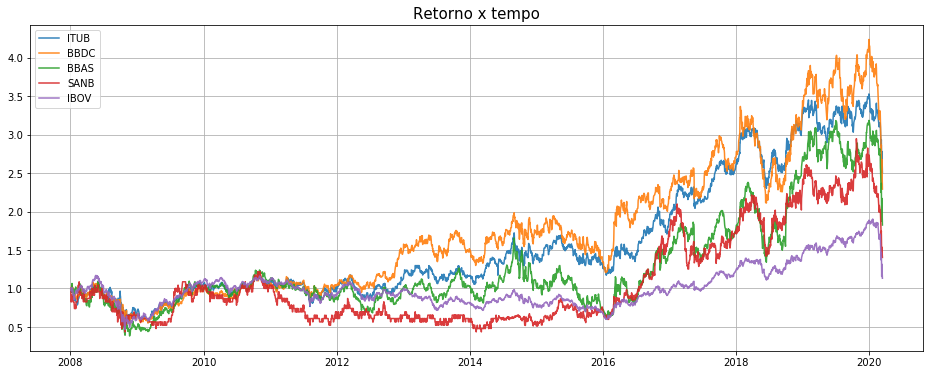

In [59]:
return_sum = pd.DataFrame()
for ticker in tickers:
    return_sum[ticker] = (returns[ticker]+1).cumprod()
return_sum['Date'] = returns['Date']

plt.figure(figsize=(16,6))
plt.plot(return_sum['Date'], return_sum.drop(['Date'], axis = 1), alpha = 0.9)
plt.legend(tickers)
plt.title("Retorno x tempo", fontsize = 15)
plt.grid()
plt.show()